In [1]:
#allows drawing digrams in jupyeter notebooks
%matplotlib inline
#loading tensorboard
%load_ext tensorboard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#specific tensorflow libraries
import tensorflow as tf
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import datetime

In [4]:
from pandas.plotting import scatter_matrix

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
def Train_Test_XY_normalize_PCA(TrainX, TrainY, PCA_n = None):
    
    # normalize data
    scaler_new = StandardScaler()
    scaler_new.fit(TrainX)
    X_train_scale = scaler_new.transform(TrainX)
    print(f'X shape {X_train_scale.shape}')
    
    if PCA_n != None:
        # dimension reduction
        TrainX_PCA = Train_Test_XY_PCA(X_train_scale, PCA_n = PCA_n)
        print(f'X shape {TrainX_PCA.shape}')
    
        # normalize again
        scaler_new = StandardScaler()
        scaler_new.fit(TrainX_PCA)
        X_train_scale = scaler_new.transform(TrainX_PCA)
        
    
    X_train, X_test, y_train, y_test = train_test_split(X_train_scale,TrainY,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=2020,
                                                       stratify=TrainY)
    
    
    return X_train, X_test, y_train, y_test

In [7]:
import tensorflow.keras.backend as Kb

# Write a custom loss function
def custom_loss(y_true, y_pred):
    binary_crossentropy = Kb.mean(Kb.binary_crossentropy(y_true, y_pred), axis = -1)
    prob_constraint = Kb.square(Kb.sum(y_pred, axis = -1)
                                - Kb.sum(y_true, axis = -1))

    return(binary_crossentropy+prob_constraint)

In [8]:
def NN_TF_model(structure, ipt_dim, learning_rate=0.01):
    model=Sequential()

    model.add(layers.Dense(structure[0], input_shape=(ipt_dim,), activation='relu'))
    
    for i in range(len(structure)-1):
        model.add(layers.Dense(structure[i+1], activation='relu'))
        
    model.add(layers.Dense(1, activation='sigmoid'))

    # opt = optimizers.SGD(learning_rate=0.01)
    # opt = optimizers.Adam(learning_rate=0.1)
    opt = optimizers.Nadam(learning_rate=0.01)

    # model.compile(loss='mean_squared_error', optimizer=opt)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    # model.compile(loss=custom_loss, optimizer=opt)
    # model.compile(loss='huber', optimizer=opt)
    # model.compile(loss='binary_focal_crossentropy', optimizer=opt)
    print(model.summary())
    
    return model

# simple NN model

In [9]:
# import seaborn as sns
# sns.pairplot(data=tm_players,
#              y_vars = ['Winner'],
#              x_vars = see_column2)



In [10]:
# see_column = np.array(['Rk', 'AvAge', 'GP', 'W', 'L', 'OL', 'PTS', 'PTS%',
#        'GF', 'GA', 'SOW', 'SOL', 'SRS', 'SOS', 'GF/G', 'GA/G', 'PP', 'PPO',
#        'PP%', 'PPA', 'PPOA', 'PK%', 'SH', 'SHA', 'PIM/G', 'oPIM/G', 'S', 'S%',
#        'SA', 'SV%', 'SO', 'Hits', 'Hits/60', 'BkS', 'BkS/60', 'GvA', 'GvA/60',
#        'TkA', 'TkA/60', 'ENG', 'MsS', '5v5 TOI/GP', 'SAT%', 'Playoffs%',
#        'Playoffs', 'WonCup', 'TA/GA'])

see_column = np.array(['PTS', 'W','L', 'GF', 'GA', 'SRS', 
                                  'SOS', 'PK%', 'S%', 'SV%', 'SAT%', 
                                  'MsS', 'TA/GA'])
# see_column = np.array(['W', 'L', 'GA', 'SAT%', 'TA/GA'])

see_column2 = np.array(['Winner',
                       'F_home_assists', 'F_home_goals', 'F_home_pim', 'F_home_shots',
                       'F_home_blocked', 'F_home_pm', 'D_home_assists', 'D_home_goals',
                       'D_home_pim', 'D_home_shots', 'D_home_blocked', 'D_home_hits',
                       'D_home_pm', 'G_home_GAA', 'F_away_assists', 'F_away_goals',
                       'F_away_pim', 'F_away_shots', 'F_away_blocked', 'F_away_hits',
                       'F_away_pm', 'D_away_assists', 'D_away_goals', 'D_away_pim',
                       'D_away_shots', 'D_away_blocked', 'D_away_hits', 'D_away_pm',
                       'G_away_GAA', 'F_home_hits'])


column_home = np.array([i+'_H' for i in see_column])
column_away = np.array([i+'_A' for i in see_column])

column_name = np.concatenate((column_home,column_away))

column_name = np.concatenate((see_column2,column_name))
#  column_name = np.concatenate((column_name,['class'])) # Winner is the class

# ## only consider tm data
# column_home = np.array([i+'_H' for i in see_column])
# column_away = np.array([i+'_A' for i in see_column])
# column_name = np.concatenate((column_home,column_away))
# column_name = np.concatenate((['Winner'],column_name)) # Winner is the class

## only consider players data
column_name = see_column2

print(column_name)
print(len(column_name))

['Winner' 'F_home_assists' 'F_home_goals' 'F_home_pim' 'F_home_shots'
 'F_home_blocked' 'F_home_pm' 'D_home_assists' 'D_home_goals' 'D_home_pim'
 'D_home_shots' 'D_home_blocked' 'D_home_hits' 'D_home_pm' 'G_home_GAA'
 'F_away_assists' 'F_away_goals' 'F_away_pim' 'F_away_shots'
 'F_away_blocked' 'F_away_hits' 'F_away_pm' 'D_away_assists'
 'D_away_goals' 'D_away_pim' 'D_away_shots' 'D_away_blocked' 'D_away_hits'
 'D_away_pm' 'G_away_GAA' 'F_home_hits']
31


#### Train NN model

In [11]:
tm_players = pd.read_csv('tm_player_stats_2005_2021.csv')

tm_players[column_name].sample(1)

,Winner,F_home_assists,F_home_goals,F_home_pim,F_home_shots,F_home_blocked,F_home_pm,D_home_assists,D_home_goals,D_home_pim,...,F_away_pm,D_away_assists,D_away_goals,D_away_pim,D_away_shots,D_away_blocked,D_away_hits,D_away_pm,G_away_GAA,F_home_hits
6231,1,0.993978,0.769472,1.629385,7.909387,1.409462,-0.055844,0.67628,0.197776,1.864927,...,0.177063,0.929502,0.187523,1.313032,4.308478,4.452491,2.518393,0.20302,2.365582,3.977412


In [12]:
# Traindf_diff = pd.DataFrame(data = Traindf[column_home].to_numpy() 
#                                     - Traindf[column_away].to_numpy(), 
#                             columns = see_column)

Traindf = tm_players[column_name]
TrainX_array = Traindf[column_name[1:]].to_numpy()
TrainY_array = Traindf[column_name[0]].to_numpy()
print(sum(TrainY_array)/len(TrainY_array))

0.4528204835114591


In [13]:
X_train, X_test, y_train, y_test = Train_Test_XY_normalize_PCA(TrainX_array, 
                                                               TrainY_array)

X shape (17497, 30)


In [14]:
#creating unique name for tensorboard directory
log_dir = "logs/NN/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#Tensforboard callback function
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

struct = [20,10,30]
dim = X_train.shape[1]
model = NN_TF_model(structure = struct, ipt_dim = dim)
history = model.fit(X_train,
                  y_train,
                  validation_split = 0.2,
                  epochs=300,
                  batch_size=100,
                  shuffle=True,
                  callbacks=[tensorboard_callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 30)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
112/112 [==============================] - 1s 3ms/step - loss: 0.6633 - accuracy: 0.5967 - val_loss: 0.6558 - val_accuracy: 0.6089
Epoch 2/300
112/112 [=================

112/112 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6782 - val_loss: 0.7390 - val_accuracy: 0.5786
Epoch 52/300
112/112 [==============================] - 0s 1ms/step - loss: 0.5929 - accuracy: 0.6815 - val_loss: 0.7287 - val_accuracy: 0.5904
Epoch 53/300
112/112 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.6786 - val_loss: 0.7545 - val_accuracy: 0.5818
Epoch 54/300
112/112 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.6830 - val_loss: 0.7268 - val_accuracy: 0.5871
Epoch 55/300
112/112 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.6849 - val_loss: 0.7419 - val_accuracy: 0.5757
Epoch 56/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.6865 - val_loss: 0.7399 - val_accuracy: 0.5671
Epoch 57/300
112/112 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.6885 - val_loss: 0.7464 - val_accuracy: 0.5800
Epoch

Epoch 108/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7013 - val_loss: 0.7729 - val_accuracy: 0.5657
Epoch 109/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7073 - val_loss: 0.8310 - val_accuracy: 0.5736
Epoch 110/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7072 - val_loss: 0.8482 - val_accuracy: 0.5693
Epoch 111/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7072 - val_loss: 0.8412 - val_accuracy: 0.5661
Epoch 112/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7057 - val_loss: 0.8165 - val_accuracy: 0.5754
Epoch 113/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7053 - val_loss: 0.8339 - val_accuracy: 0.5743
Epoch 114/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7036 - val_loss: 0.8377 - val_ac

112/112 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.7169 - val_loss: 0.8879 - val_accuracy: 0.5654
Epoch 165/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7132 - val_loss: 0.8893 - val_accuracy: 0.5686
Epoch 166/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7130 - val_loss: 0.8665 - val_accuracy: 0.5725
Epoch 167/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7158 - val_loss: 0.9033 - val_accuracy: 0.5714
Epoch 168/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.7168 - val_loss: 0.9512 - val_accuracy: 0.5693
Epoch 169/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7154 - val_loss: 0.9195 - val_accuracy: 0.5696
Epoch 170/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7143 - val_loss: 0.9190 - val_accuracy: 0.5686

112/112 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.7137 - val_loss: 0.8873 - val_accuracy: 0.5679
Epoch 221/300
112/112 [==============================] - 0s 1ms/step - loss: 0.5573 - accuracy: 0.7150 - val_loss: 0.9193 - val_accuracy: 0.5696
Epoch 222/300
112/112 [==============================] - 0s 1ms/step - loss: 0.5596 - accuracy: 0.7160 - val_loss: 0.9027 - val_accuracy: 0.5682
Epoch 223/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7178 - val_loss: 0.9748 - val_accuracy: 0.5696
Epoch 224/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.7174 - val_loss: 0.9231 - val_accuracy: 0.5661
Epoch 225/300
112/112 [==============================] - 0s 1ms/step - loss: 0.5534 - accuracy: 0.7149 - val_loss: 0.9416 - val_accuracy: 0.5679
Epoch 226/300
112/112 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.7179 - val_loss: 0.9959 - val_accuracy: 0.5700

112/112 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7198 - val_loss: 0.9310 - val_accuracy: 0.5671
Epoch 277/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7198 - val_loss: 0.9623 - val_accuracy: 0.5721
Epoch 278/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7239 - val_loss: 0.9286 - val_accuracy: 0.5679
Epoch 279/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7199 - val_loss: 0.9683 - val_accuracy: 0.5771
Epoch 280/300
112/112 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.7191 - val_loss: 1.0022 - val_accuracy: 0.5718
Epoch 281/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7206 - val_loss: 0.9423 - val_accuracy: 0.5736
Epoch 282/300
112/112 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7164 - val_loss: 0.9650 - val_accuracy: 0.5739

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


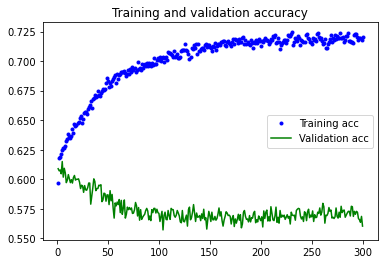

In [15]:
model.test_on_batch(X_test, y_test)
model.metrics_names
print(history.history.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b.', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'b.', label='Training loss')
# plt.plot(epochs, val_loss, 'g', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

plt.show()

In [16]:
m = metrics.Accuracy()
mc = metrics.CategoricalAccuracy()

In [17]:
y_hat=model.predict(X_train)>0.5
y_hat=np.squeeze(y_hat)*1

438/438 [==============================] - 0s 620us/step


In [18]:
m.update_state(y_train, y_hat)
mc.update_state(y_train, y_hat)
print('away win rate = ', sum(y_hat)/len(y_hat))
print('Train data accuracy',m.result().numpy())
# print('Train data categorical accuracy',mc.result().numpy())
tf.math.confusion_matrix(y_train, y_hat)

away win rate =  0.4419518468243195
Train data accuracy 0.6930771


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5587, 2072],
       [2224, 4114]], dtype=int32)>

In [19]:
y_hat=model.predict(X_test)>0.5
y_hat=np.squeeze(y_hat)*1

110/110 [==============================] - 0s 587us/step


In [20]:
m.update_state(y_test, y_hat)
print('away win rate = ',sum(y_hat)/len(y_hat))
print('Test data accuracy',m.result().numpy())
tf.math.confusion_matrix(y_test, y_hat)

away win rate =  0.44657142857142856
Test data accuracy 0.6701149


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1188,  727],
       [ 749,  836]], dtype=int32)>